# Importing the neccessary libraries and Loading the Files

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '../In_Lab/lab_5.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
sheet_names

['Exp_1_35',
 'Exp_1_45',
 'Exp_1_55',
 'Exp_1_65',
 'Exp_2_35',
 'Exp_2_45',
 'Exp_2_55',
 'Exp_2_65',
 'Exp_2_75']

In [81]:
import matplotlib.pyplot as plt

# Function to load and prepare data from a specific experiment
def load_experiment_data(sheet_names, xls, experiment_prefix):
    data = {}
    for sheet in sheet_names:
        if sheet.startswith(experiment_prefix):
            temperature = sheet.split('_')[2]  # Extract temperature from sheet name
            df = pd.read_excel(xls, sheet_name=sheet)
            data[temperature] = df
    return data

# Load data for both experiments
exp_1_data = load_experiment_data(sheet_names, xls, 'Exp_1')
exp_2_data = load_experiment_data(sheet_names, xls, 'Exp_2')

# Plot I_d v/s V_d and ln(I_d) v/s V_d for Experiment 1

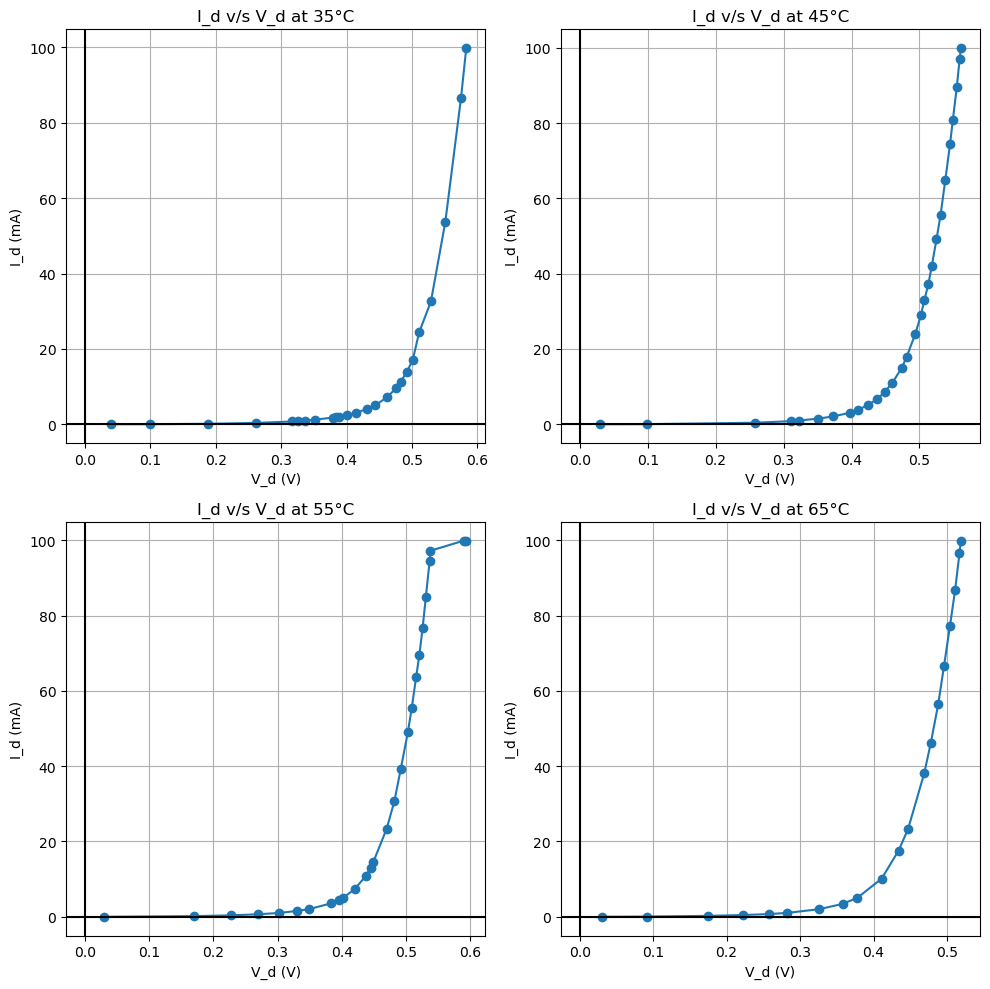

In [82]:
plt.subplots(2, 2, figsize=(10, 10))
count = 1
for temperature, df in exp_1_data.items():
    plt.subplot(2, 2, count)
    count += 1
    plt.plot(df['V_d'], df['I_d'], marker='o')
    plt.title(f'I_d v/s V_d at {temperature}°C')
    plt.xlabel('V_d (V)')
    plt.ylabel('I_d (mA)')
    plt.grid(True)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
plt.tight_layout()

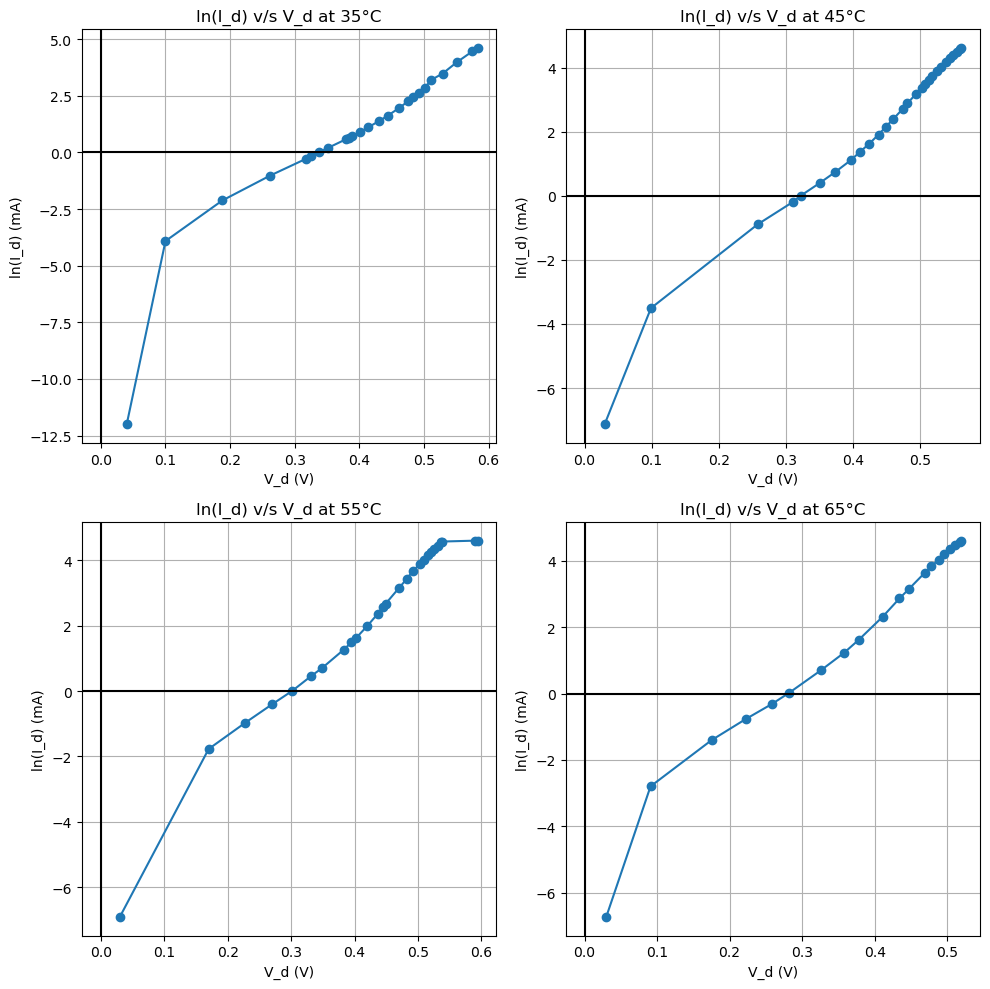

In [83]:
plt.subplots(2, 2, figsize=(10, 10))
count = 1
for temperature, df in exp_1_data.items():
    df['ln(I_d)'] = df['I_d'].apply(lambda x: -12 if x == 0 else np.log(x))
    plt.subplot(2, 2, count)
    count += 1
    plt.plot(df['V_d'], df['ln(I_d)'], marker='o')
    plt.title(f'ln(I_d) v/s V_d at {temperature}°C')
    plt.xlabel('V_d (V)')
    plt.ylabel('ln(I_d) (mA)')
    plt.grid(True)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
plt.tight_layout()

In [84]:
# Temperature | Vd for Id =1mA | Vd for Id =2mA | Vd for Id =5mA | η for low forward bias | η for high forward bias
# 35◦ C | | | | |
# 45◦ C | | | | |
# 55◦ C | | | | |
# 65◦ C | | | | |

def calculate_eta(df):
    # Calculate Vd for Id = 1mA, 2mA, 5mA
    Vd_1mA = df.loc[(df['I_d'] - 1).abs().argsort()[:1]]['V_d'].values[0] 
    Vd_2mA = df.loc[(df['I_d'] - 2).abs().argsort()[:1]]['V_d'].values[0] 
    Vd_5mA = df.loc[(df['I_d'] - 5).abs().argsort()[:1]]['V_d'].values[0] 
    
    # slope of the line for low forward bias
    x1, y1 = df.iloc[1]['V_d'], df.iloc[1]['ln(I_d)']
    x2, y2 = df.iloc[2]['V_d'], df.iloc[2]['ln(I_d)']
    slope_low = (y2 - y1) / (x2 - x1)
    eta_low = 1 / (slope_low * 0.026)
    
    # slope of the line for high forward bias
    x1, y1 = df.iloc[-3]['V_d'], df.iloc[-3]['ln(I_d)']
    x2, y2 = df.iloc[-2]['V_d'], df.iloc[-2]['ln(I_d)']
    slope_high = (y2 - y1) / (x2 - x1)
    eta_high = 1 / (slope_high * 0.026)
    
    return Vd_1mA, Vd_2mA, Vd_5mA, eta_low, eta_high

observations_list = []
for temperature, df in exp_1_data.items():
    Vd_1mA, Vd_2mA, Vd_5mA, eta_low, eta_high = calculate_eta(df)
    observations_list.append({
        'Temperature': temperature, 
        'Vd for Id =1mA': Vd_1mA, 
        'Vd for Id =2mA': Vd_2mA, 
        'Vd for Id =5mA': Vd_5mA, 
        'η for low forward bias': eta_low, 
        'η for high forward bias': eta_high
    })

# Convert the list of dictionaries to a DataFrame
observations = pd.DataFrame(observations_list)

# Special calculations for temperature 55°C, eta for high forward bias
x1, y1 = exp_1_data['55']['V_d'].iloc[-8], exp_1_data['55']['ln(I_d)'].iloc[-7] # Irregular data point in the last
x2, y2 = exp_1_data['55']['V_d'].iloc[-7], exp_1_data['55']['ln(I_d)'].iloc[-6] # Irregular data point in the last
slope_high = (y2 - y1) / (x2 - x1)
eta_high = 1 / (slope_high * 0.026)
observations.loc[observations['Temperature'] == '55', 'η for high forward bias'] = eta_high

observations

,Temperature,Vd for Id =1mA,Vd for Id =2mA,Vd for Id =5mA,η for low forward bias,η for high forward bias
0,35,0.337,0.388,0.444,1.888990,1.931581
1,45,0.322,0.373,0.424,2.338615,1.992600
2,55,0.302,0.349,0.402,2.764271,1.979755
3,65,0.282,0.326,0.378,2.323652,2.154927


In [85]:
# \begin{table}[h!]
#     \centering
#     \begin{tabular}{|c|c|c|c|c|c|c|}
#         \hline
#         \textbf{Temperature (°C)} & $V_{oc}$ (V) & $I_{sc}$ (mA) & $V_m$ (V) & $I_m$ (mA) & FF \\ \hline
#         75 & 0.3205 & 9.6078 & 0.2000 & 6.0156 & 0.3907 \\ \hline
#         65 & 0.3469 & 9.6875 & 0.2187 & 6.5625 & 0.4271 \\ \hline
#         55 & 0.3719 & 9.7656 & 0.2594 & 5.7813 & 0.4129 \\ \hline
#         45 & 0.3938 & 9.7657 & 0.2656 & 6.5625 & 0.4532 \\ \hline
#         35 & 0.4211 & 9.8437 & 0.2912 & 6.6406 & 0.4665 \\ \hline
#     \end{tabular}
#     \caption{Fill Factor Calculation at Different Temperatures}
# \end{table}

def dataframe_to_latex(df, caption=None, label=None, index=False):
    print(r"\begin{table}[!h]")
    print(r"    \centering")
    print(r"    \begin{tabular}{|" + "c|" * len(df.columns) + "}")
    print(r"        \hline")
    print(r"        " + " & ".join(df.columns) + r" \\ \hline")
    for index, row in df.iterrows():
        print(r"        " + " & ".join([str(val) for val in row.values]) + r" \\ \hline")
    print(r"    \end{tabular}")
    if caption:
        print(r"    \caption{" + caption + "}")
    if label:
        print(r"    \label{" + label + "}")
    print(r"\end{table}")

latex_table = dataframe_to_latex(observations, caption="Observations for Experiment 1", label="tab:experiment_1")
print(latex_table)

\begin{table}[!h]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|}
        \hline
        Temperature & Vd for Id =1mA & Vd for Id =2mA & Vd for Id =5mA & η for low forward bias & η for high forward bias \\ \hline
        35 & 0.337 & 0.388 & 0.444 & 1.8889898129426832 & 1.9315806503366812 \\ \hline
        45 & 0.322 & 0.373 & 0.424 & 2.3386151736441594 & 1.9925999861540258 \\ \hline
        55 & 0.302 & 0.349 & 0.402 & 2.7642709264830274 & 1.979754502376028 \\ \hline
        65 & 0.282 & 0.326 & 0.378 & 2.323651901864975 & 2.1549268585465833 \\ \hline
    \end{tabular}
    \caption{Observations for Experiment 1}
    \label{tab:experiment_1}
\end{table}
None


# Plot I_L v/s V_L Exp 2

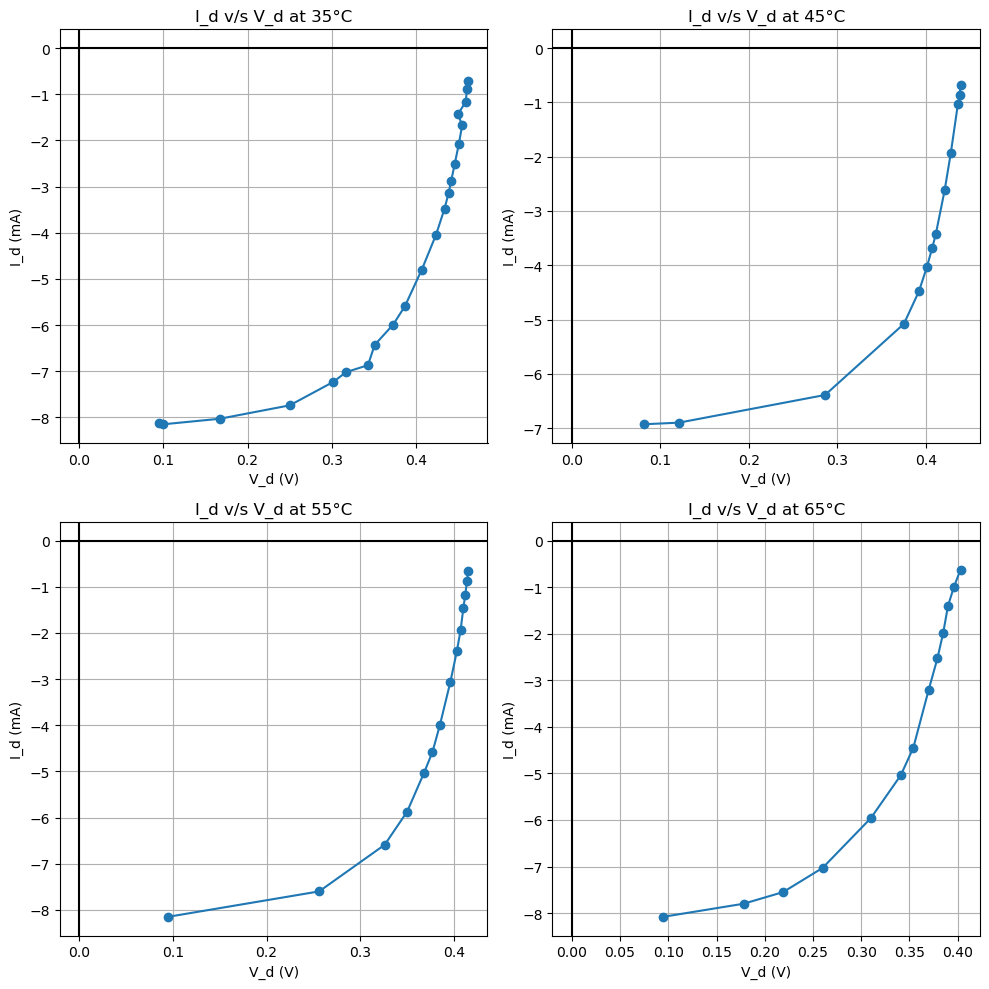

In [86]:
# There are 5 total subplots in the figure
# Make it like 
# Image 1, Image 2
# Image 3, Image 4 
#     Image 5 (centered)

plt.subplots(2, 2, figsize=(10, 10))
count = 1
for temperature, df in exp_2_data.items():
    if (count == 5):
        break
    plt.subplot(2, 2, count)
    count += 1
    plt.plot(df['V_d'], df['I_d'], marker='o')
    plt.title(f'I_d v/s V_d at {temperature}°C')
    plt.xlabel('V_d (V)')
    plt.ylabel('I_d (mA)')
    plt.grid(True)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
plt.tight_layout()

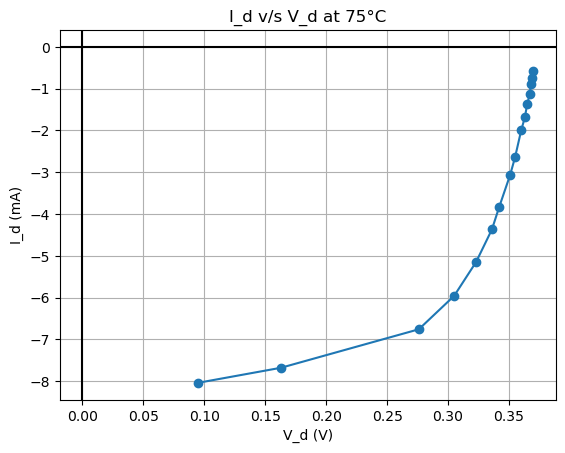

In [87]:
# Plot the last subplot in the center
plt.plot(exp_2_data['75']['V_d'], exp_2_data['75']['I_d'], marker='o')
plt.title(f'I_d v/s V_d at 75°C')
plt.xlabel('V_d (V)')
plt.ylabel('I_d (mA)')
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Combine I_d v/s V_d 

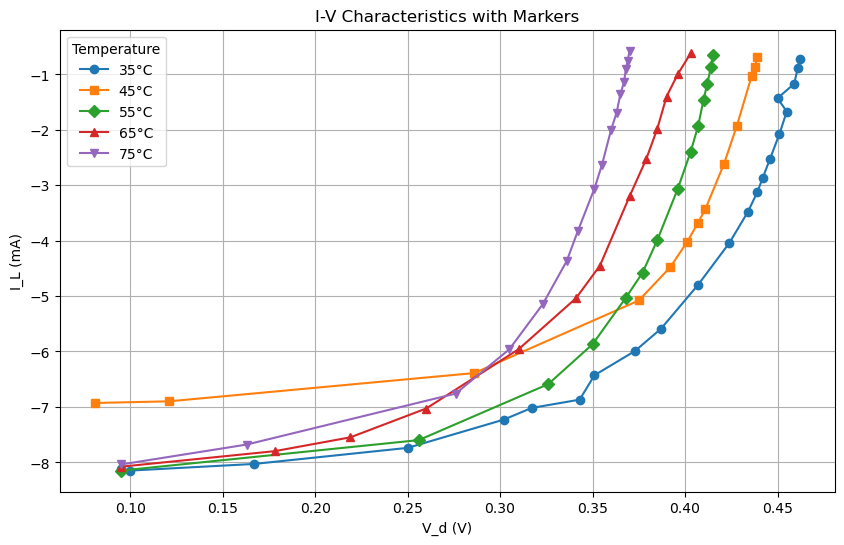

In [88]:
plt.figure(figsize=(10, 6))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x']  # List of markers
for (temperature, df), marker in zip(exp_2_data.items(), markers):
    plt.plot(df['V_d'], df['I_d'], label=f"{temperature}°C", marker=marker)

plt.xlabel('V_d (V)')
plt.ylabel('I_L (mA)')
plt.title(f'I-V Characteristics with Markers')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()

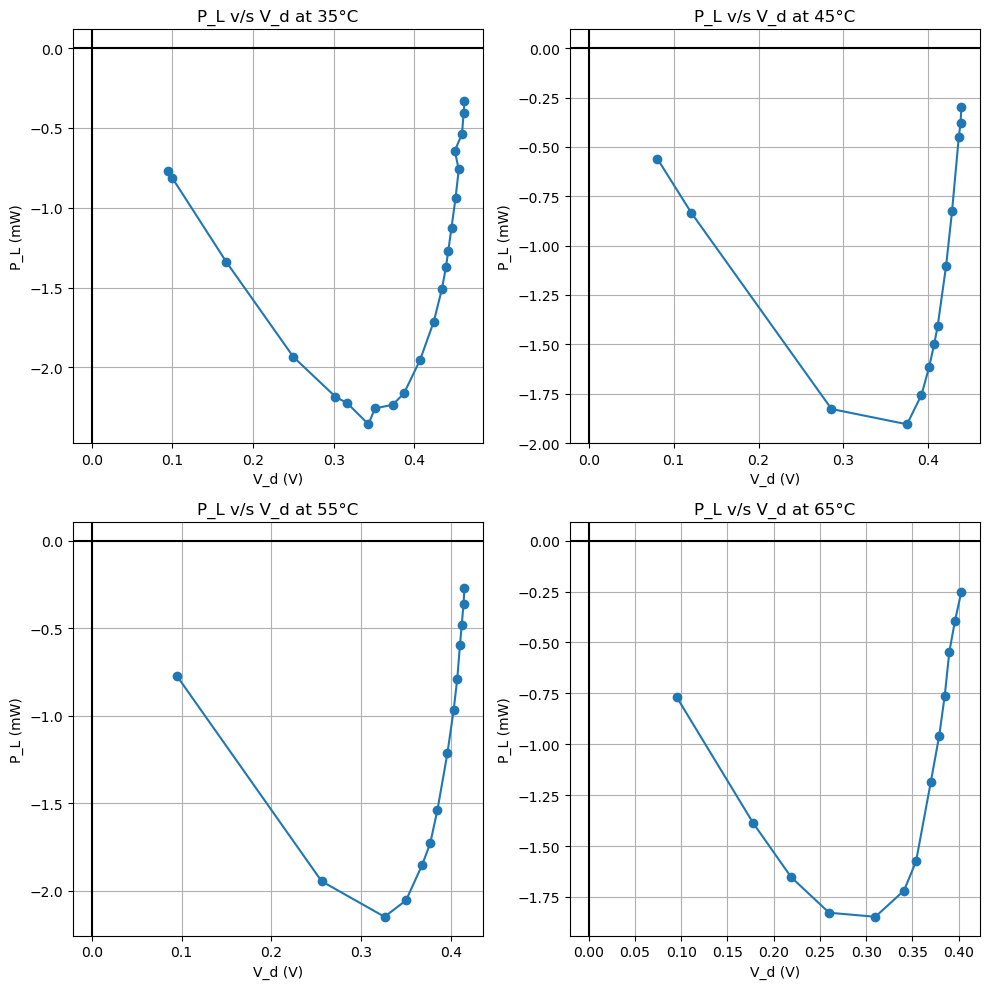

In [89]:
# Create an additional column of P_L for each temperature in exp_2_data and plot it in a similar manner
plt.subplots(2, 2, figsize=(10, 10))
count = 1
for temperature, df in exp_2_data.items():
    if (count == 5):
        break
    df['P_L'] = df['V_d'] * df['I_d']
    plt.subplot(2, 2, count)
    count += 1
    plt.plot(df['V_d'], df['P_L'], marker='o')
    plt.title(f'P_L v/s V_d at {temperature}°C')
    plt.xlabel('V_d (V)')
    plt.ylabel('P_L (mW)')
    plt.grid(True)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
plt.tight_layout()

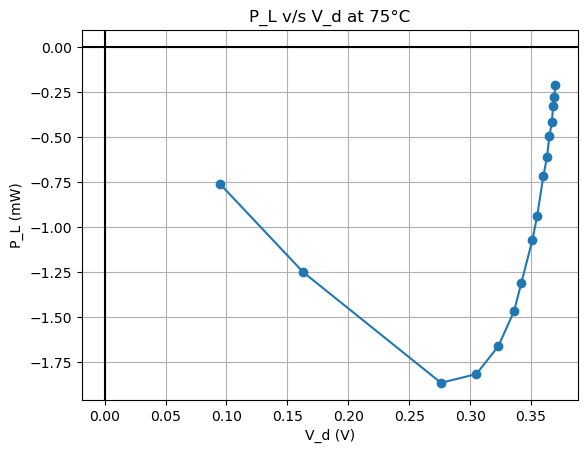

In [90]:
# Plot the last subplot in the center
exp_2_data['75']['P_L'] = exp_2_data['75']['V_d'] * exp_2_data['75']['I_d']
plt.plot(exp_2_data['75']['V_d'], exp_2_data['75']['P_L'], marker='o')
plt.title(f'P_L v/s V_d at 75°C')
plt.xlabel('V_d (V)')
plt.ylabel('P_L (mW)')
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Combine all P_L v/s V_d graph

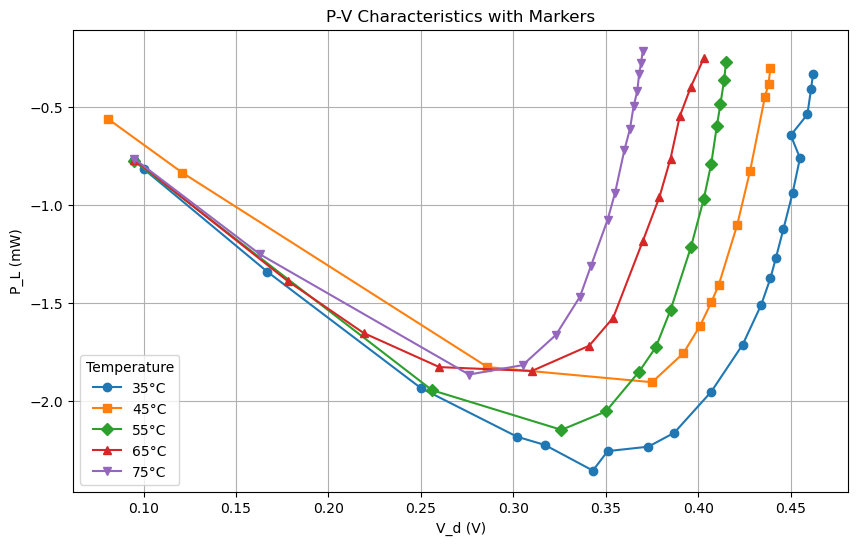

In [91]:
plt.figure(figsize=(10, 6))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x']  # List of markers
for (temperature, df), marker in zip(exp_2_data.items(), markers):
    plt.plot(df['V_d'], df['P_L'], label=f"{temperature}°C", marker=marker)

plt.xlabel('V_d (V)')
plt.ylabel('P_L (mW)')
plt.title(f'P-V Characteristics with Markers')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()

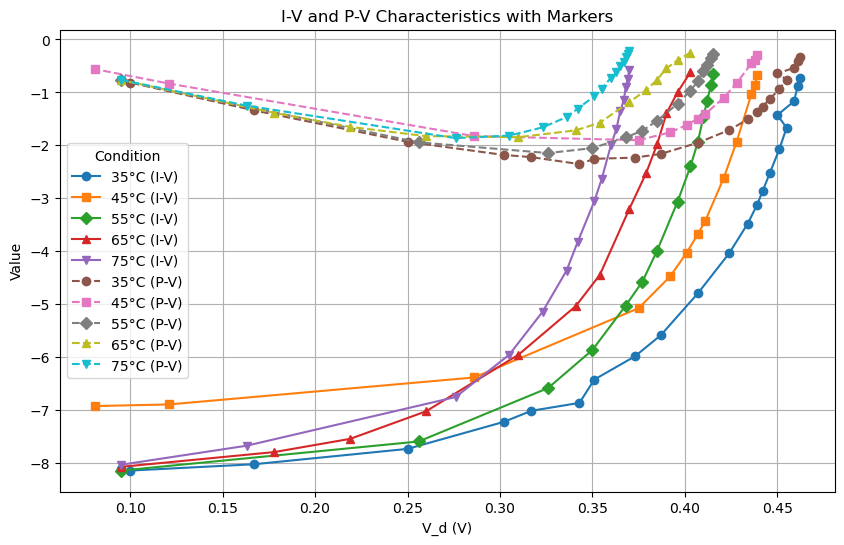

In [92]:
import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(10, 6))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x']  # List of markers

# Plot I-V Characteristics
for (temperature, df), marker in zip(exp_2_data.items(), markers):
    plt.plot(df['V_d'], df['I_d'], label=f"{temperature}°C (I-V)", marker=marker)

# Plot P-V Characteristics
for (temperature, df), marker in zip(exp_2_data.items(), markers):
    plt.plot(df['V_d'], df['P_L'], label=f"{temperature}°C (P-V)", linestyle='--', marker=marker)

plt.xlabel('V_d (V)')
plt.ylabel('Value')
plt.title('I-V and P-V Characteristics with Markers')
plt.legend(title='Condition')
plt.grid(True)
plt.show()


In [93]:
# Create a new observation list for Experiment 2
observations_list = []
for temperature, df in exp_2_data.items():
    V_oc = df['V_d'].iloc[-1]
    I_sc = df['I_d'].iloc[0]
    V_m = df.loc[(df['P_L']).abs().argsort()[:1]]['V_d'].values[0]
    I_m = df.loc[(df['P_L']).abs().argsort()[:1]]['I_d'].values[0]
    FF = (V_m * I_m) / (V_oc * I_sc)
    observations_list.append({
        'Temperature': temperature, 
        'V_oc': V_oc, 
        'I_sc': I_sc, 
        'V_m': V_m, 
        'I_m': I_m, 
        'FF': FF
    })

# Convert the list of dictionaries to a DataFrame
observations_exp_2 = pd.DataFrame(observations_list)

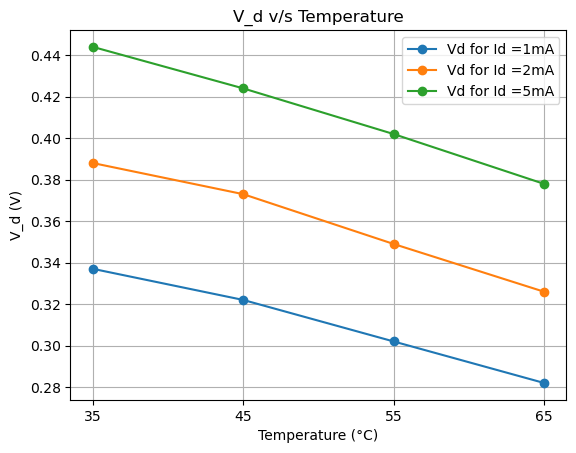

In [94]:
# Plot Vd v/s temperature. You will get three al Results
plt.ylabel('V_d (V)')
plt.title('V_d v/s Temperature')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Voc v/s Temperature')

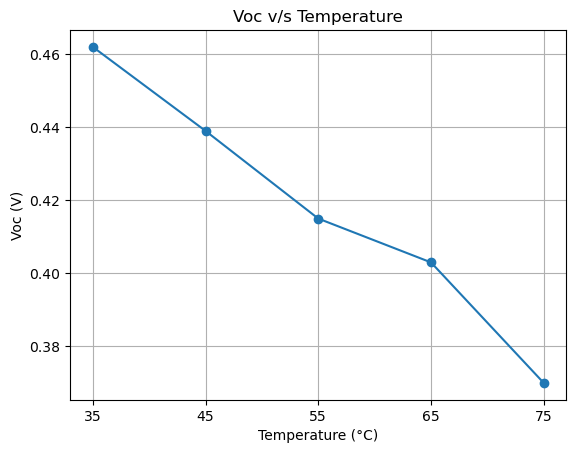

In [95]:
# Plot Voc v/s temperature. You will get three sets of Vd for Id equal to 1mA, 2mA and 5mA each obtained in part - 1
# Voc is the voltage at which the current is zero or very close to zero

# Firstly, lets calculate Voc for each temperature
def calculate_voc(df):
    return df.loc[(df['I_d']).abs().argsort()[:1]]['V_d'].values[0]

observations_exp_2['Voc'] = observations_exp_2.apply(lambda row: calculate_voc(exp_2_data[row['Temperature']]), axis=1)

plt.plot(observations_exp_2['Temperature'], observations_exp_2['Voc'], marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Voc (V)')
plt.grid(True)
plt.title('Voc v/s Temperature')


In [66]:
# * Comment upon the temperature dependence of Voc , Isc and fill factor.
# Also justify with plots

Text(0.5, 1.0, 'Isc v/s Temperature')

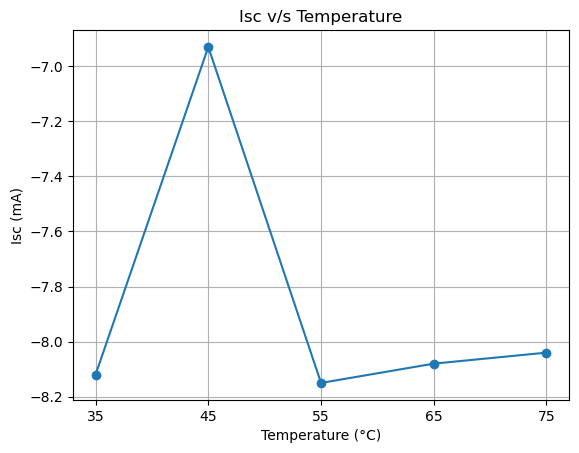

In [96]:
# Calculate Isc for each temperature
# Isc is the current when Vd is zero or very close to zero
def calculate_isc(df):
    return df.loc[(df['V_d']).abs().argsort()[:1]]['I_d'].values[0]

observations_exp_2['Isc'] = observations_exp_2.apply(lambda row: calculate_isc(exp_2_data[row['Temperature']]), axis=1)

# Isc v/s Temperature
plt.plot(observations_exp_2['Temperature'], observations_exp_2['Isc'], marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Isc (mA)')
plt.grid(True)
plt.title('Isc v/s Temperature')

Text(0.5, 1.0, 'Fill Factor v/s Temperature')

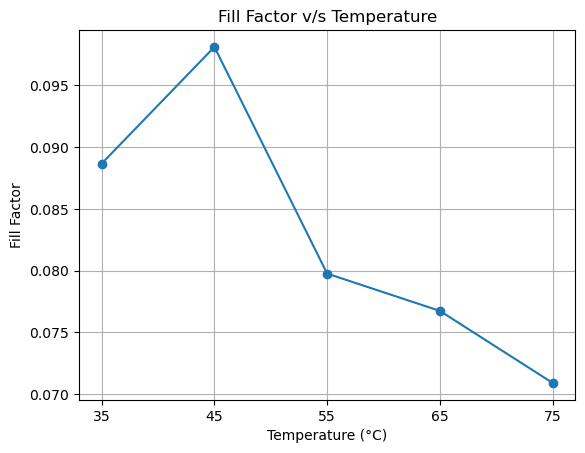

In [98]:
# compute P_max = maximum value of P_L for each temperature in exp_2_data, ignore the last temperature
observations_exp_2['P_max'] = [df['P_L'].max() for temperature, df in exp_2_data.items()]

# compute Fill Factor
observations_exp_2['FF'] = (observations_exp_2['P_max']) / (observations_exp_2['Voc'] * observations_exp_2['Isc'])


# Fill Factor v/s Temperature
plt.plot(observations_exp_2['Temperature'], observations_exp_2['FF'], marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fill Factor')
plt.grid(True)
plt.title('Fill Factor v/s Temperature')

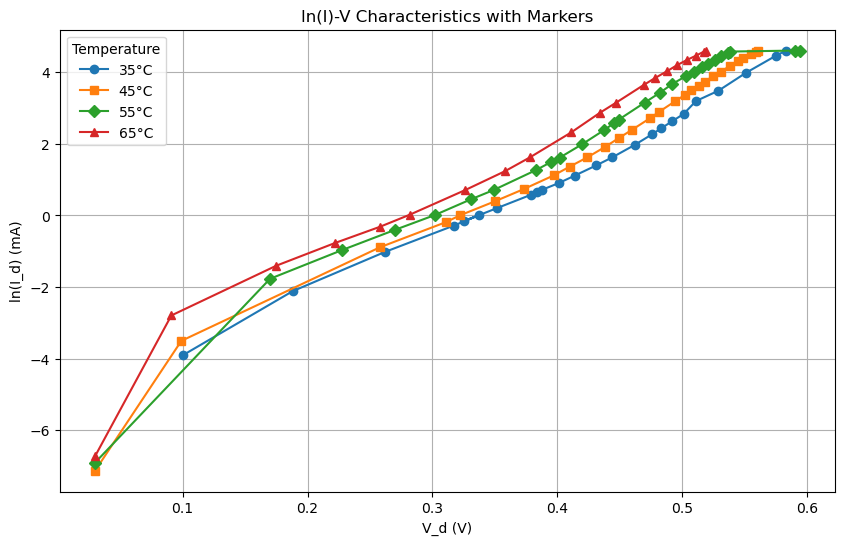

In [48]:
plt.figure(figsize=(10, 6))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x']  # List of markers
for (temperature, df), marker in zip(exp_1_data.items(), markers):
    plt.plot(df['V_d'], df['ln(I_d)'], label=f"{temperature}°C", marker=marker)

plt.xlabel('V_d (V)')
plt.ylabel('ln(I_d) (mA)')
plt.title(f'ln(I)-V Characteristics with Markers')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()

# Merged Plots of V_d v/s I_d for exp_1 and exp_2

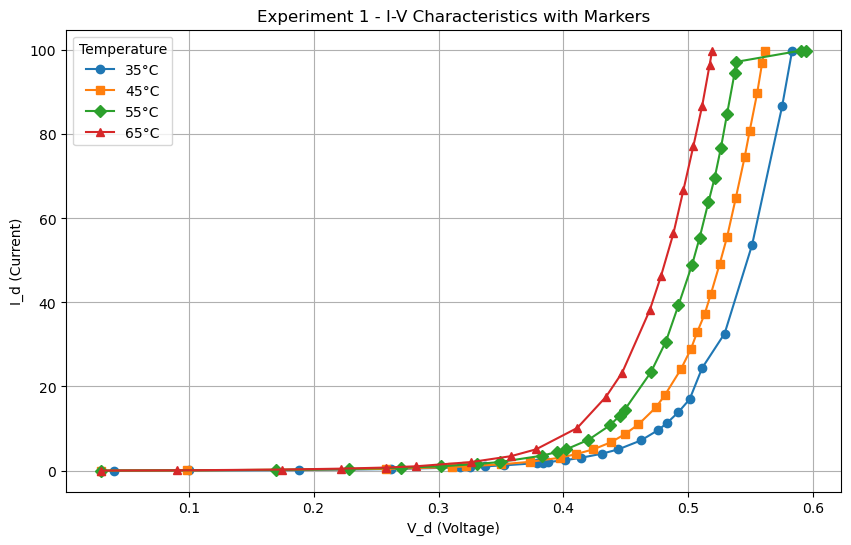

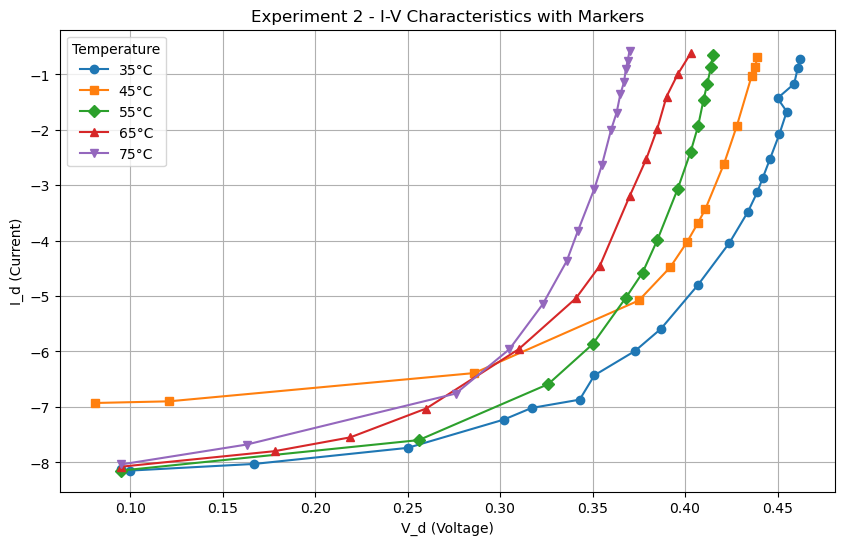

In [45]:
# Function to plot data with markers for a given experiment
def plot_experiment_data_with_markers(exp_data, experiment_name):
    plt.figure(figsize=(10, 6))
    
    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x']  # List of markers
    for (temperature, df), marker in zip(exp_data.items(), markers):
        plt.plot(df['V_d'], df['I_d'], label=f"{temperature}°C", marker=marker)
    
    plt.xlabel('V_d (Voltage)')
    plt.ylabel('I_d (Current)')
    plt.title(f'{experiment_name} - I-V Characteristics with Markers')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Plotting Experiment 1 data with markers
plot_experiment_data_with_markers(exp_1_data, 'Experiment 1')

# Plotting Experiment 2 data with markers
plot_experiment_data_with_markers(exp_2_data, 'Experiment 2')
